In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

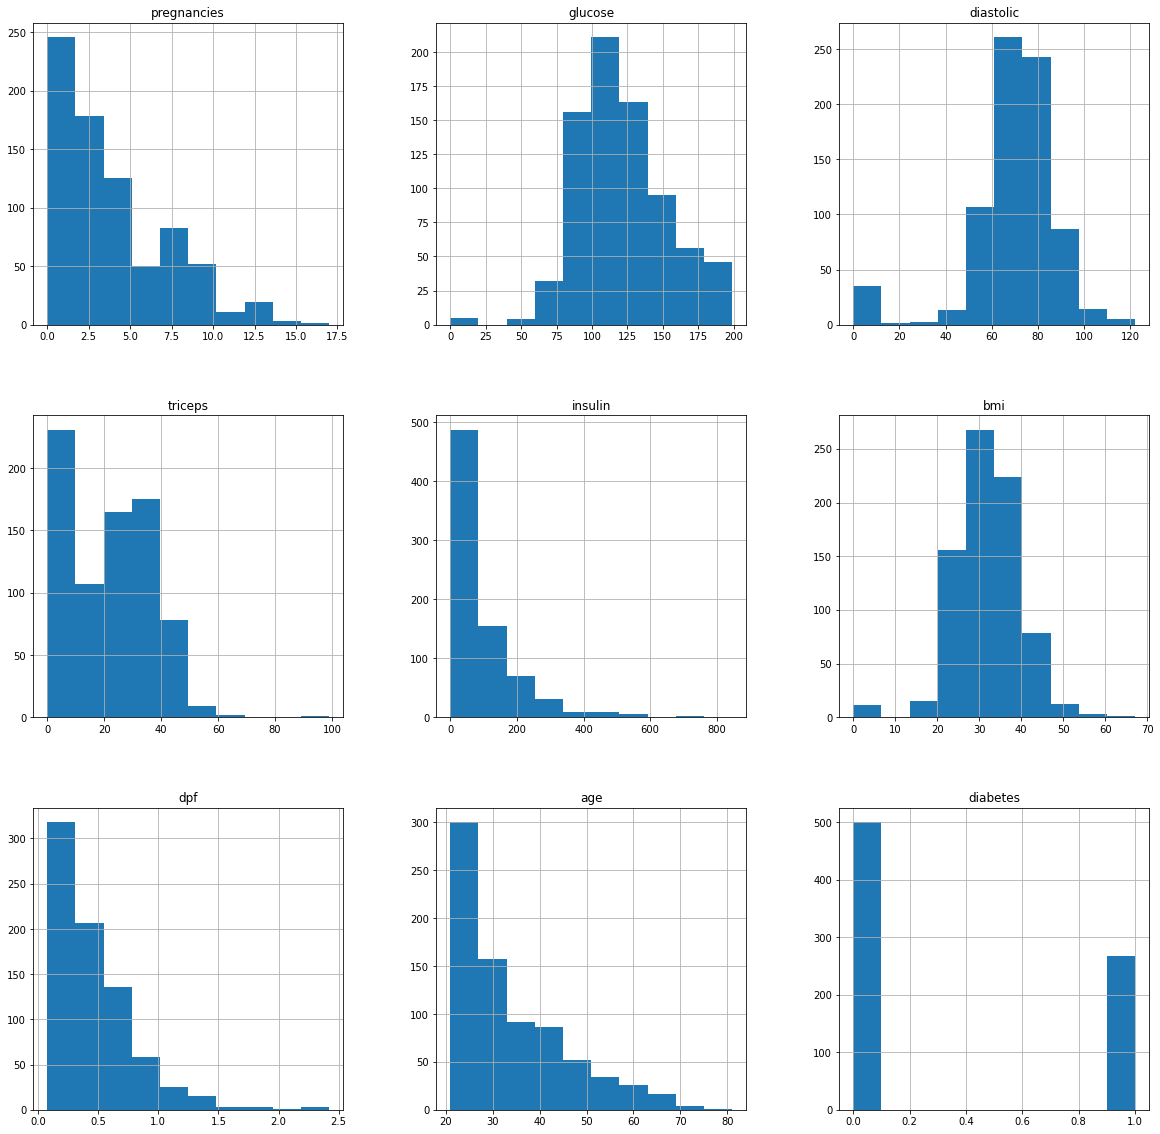

In [ ]:
df.hist(figsize = (20,20))
plt.show()

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['glucose','diastolic','triceps','insulin','bmi']] = df_copy[['glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)


print(df_copy.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


In [ ]:
df_copy['glucose'].fillna(df_copy['glucose'].mean(), inplace = True)
df_copy['diastolic'].fillna(df_copy['diastolic'].mean(), inplace = True)
df_copy['triceps'].fillna(df_copy['triceps'].median(), inplace = True)
df_copy['insulin'].fillna(df_copy['insulin'].median(), inplace = True)
df_copy['bmi'].fillna(df_copy['bmi'].median(), inplace = True)

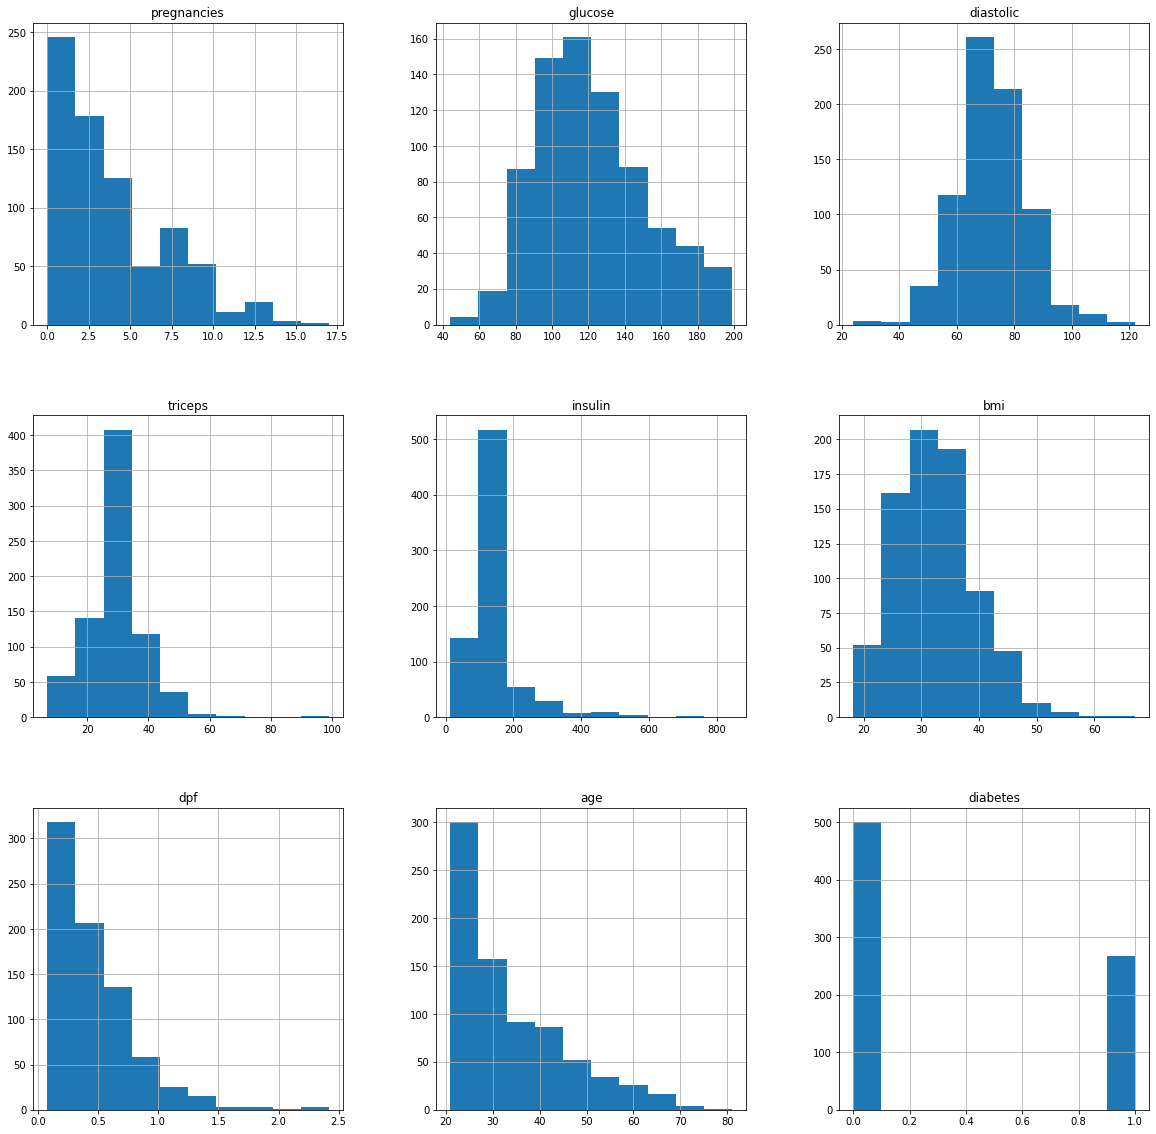

In [ ]:
df_copy.hist(figsize = (20,20))
plt.show()

0    500
1    268
Name: diabetes, dtype: int64


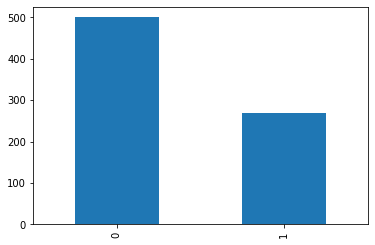

In [ ]:
print(df.diabetes.value_counts())
p=df.diabetes.value_counts().plot(kind="bar")

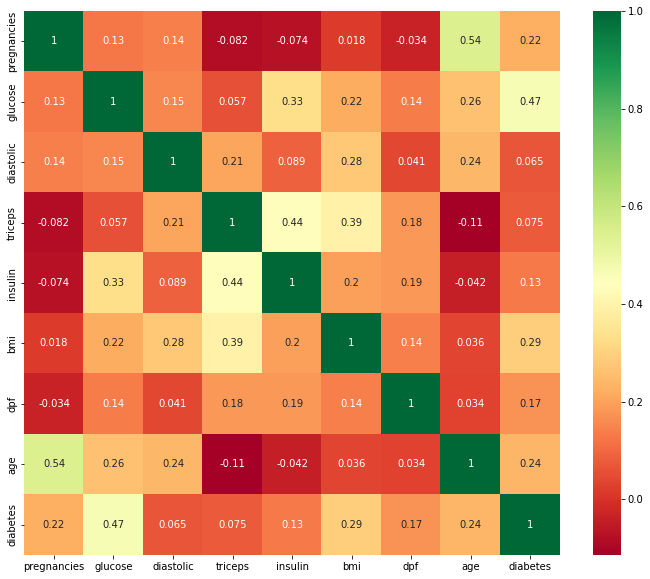

In [ ]:
plt.figure(figsize=(12,10))

p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(df_copy.drop(["diabetes"],axis = 1),), columns=['pregnancies','glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age'])
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = df_copy.diabetes
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [ ]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size = 0.30, random_state = 40)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (537, 8)
Shape of test_X:  (231, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

**DECISION** **TREEE**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
dt_predict = dt.predict(test_X)

In [ ]:
accuracy_dt = accuracy_score(test_Y, dt_predict)
f1_score_dt = f1_score(test_Y, dt_predict)
precision_score_dt = precision_score(test_Y, dt_predict)
print("precision score of Decision tree model :" , precision_score_dt*100)
print("Accuracy of Decision tree model :" , accuracy_dt*100)
print("F1 score of Decision tree model :" , f1_score_dt*100)

precision score of Decision tree model : 67.07317073170732
Accuracy of Decision tree model : 73.59307359307358
F1 score of Decision tree model : 64.32748538011695


**RANDOM** **FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
rf_predict = rf.predict(test_X)

In [ ]:
accuracy_rf = accuracy_score(test_Y, rf_predict)
f1_score_rf = f1_score(test_Y, rf_predict)
precision_score_rf = precision_score(test_Y, rf_predict)
print("precision score of Random Forest model :" , precision_score_rf*100)
print("Accuracy of Random Forest model :" , accuracy_rf*100)
print("F1 score of Random Forest model :" , f1_score_rf*100)

precision score of Random Forest model : 75.36231884057972
Accuracy of Random Forest model : 76.62337662337663
F1 score of Random Forest model : 65.82278481012659


**Random** **Forest** has more accuracy score and precision score than **Dicision** **Tree**